<a href="https://colab.research.google.com/github/lexoz-bedra/image_processing/blob/main/filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png

--2023-03-20 20:54:14--  https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png
Resolving stepik.org (stepik.org)... 185.206.166.110
Connecting to stepik.org (stepik.org)|185.206.166.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83911 (82K) [image/png]
Saving to: ‘tiger-gray-small.png’

tiger-gray-small.pn 100%[===================>]  81.94K   323KB/s    in 0.3s    

2023-03-20 20:54:15 (323 KB/s) - ‘tiger-gray-small.png’ saved [83911/83911]



In [ ]:
!wget https://stepik.org/media/attachments/lesson/61037/box-tiger.png

--2023-03-20 20:51:18--  https://stepik.org/media/attachments/lesson/61037/box-tiger.png
Resolving stepik.org (stepik.org)... 185.206.166.110
Connecting to stepik.org (stepik.org)|185.206.166.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52828 (52K) [image/png]
Saving to: ‘box-tiger.png’

box-tiger.png       100%[===================>]  51.59K   203KB/s    in 0.3s    

2023-03-20 20:51:18 (203 KB/s) - ‘box-tiger.png’ saved [52828/52828]



In [ ]:
!wget https://stepik.org/media/attachments/lesson/61037/gaussian-tiger.png

--2023-03-20 20:51:19--  https://stepik.org/media/attachments/lesson/61037/gaussian-tiger.png
Resolving stepik.org (stepik.org)... 185.206.166.110
Connecting to stepik.org (stepik.org)|185.206.166.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64805 (63K) [image/png]
Saving to: ‘gaussian-tiger.png’

gaussian-tiger.png  100%[===================>]  63.29K   245KB/s    in 0.3s    

2023-03-20 20:51:19 (245 KB/s) - ‘gaussian-tiger.png’ saved [64805/64805]



In [ ]:
!wget https://stepik.org/media/attachments/lesson/61037/unsharp-tiger.png

--2023-03-20 20:51:22--  https://stepik.org/media/attachments/lesson/61037/unsharp-tiger.png
Resolving stepik.org (stepik.org)... 185.206.166.110
Connecting to stepik.org (stepik.org)|185.206.166.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98877 (97K) [image/png]
Saving to: ‘unsharp-tiger.png’

unsharp-tiger.png   100%[===================>]  96.56K   255KB/s    in 0.4s    

2023-03-20 20:51:23 (255 KB/s) - ‘unsharp-tiger.png’ saved [98877/98877]



In [ ]:
!wget https://stepik.org/media/attachments/lesson/61041/median-tiger.png

--2023-03-20 22:59:13--  https://stepik.org/media/attachments/lesson/61041/median-tiger.png
Resolving stepik.org (stepik.org)... 185.206.166.110
Connecting to stepik.org (stepik.org)|185.206.166.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52679 (51K) [image/png]
Saving to: ‘median-tiger.png’

median-tiger.png    100%[===================>]  51.44K   204KB/s    in 0.3s    

2023-03-20 22:59:14 (204 KB/s) - ‘median-tiger.png’ saved [52679/52679]



In [ ]:
from skimage.io import imread, imshow, show, imsave
from skimage.transform import integral_image, integrate
import numpy as np

## Box-filter

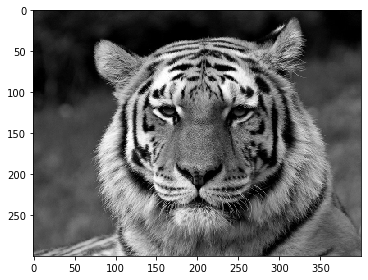

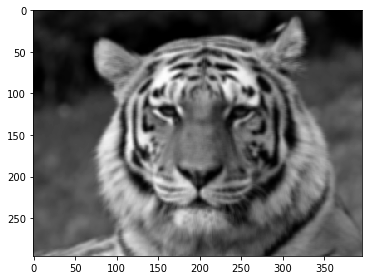

In [ ]:
img = imread('tiger-gray-small.png')
img_exp = imread('box-tiger.png')
imshow(img); show()
imshow(img_exp); show()

/usr/local/lib/python3.9/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


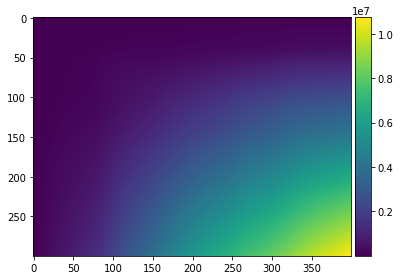

In [ ]:
img_integral = integral_image(img)
imshow(img_integral)

In [ ]:
int_img = integral_image(img)
filter_size = 5
scale_factor = 1 / (filter_size**2)
in_add = filter_size // 2
out_img = np.zeros((img.shape[0] - 2 * in_add, img.shape[1] - 2 * in_add))

for i in range(in_add, img.shape[0] - in_add):
    for j in range(in_add, img.shape[1] - in_add):
        start = (i - in_add, j - in_add)
        end = (i + in_add, j + in_add)
        kernel_sum = integrate(int_img, start, end)
        kernel_avg = kernel_sum * scale_factor
        out_img[i - in_add, j - in_add] = kernel_avg

imsave('out_img.png', out_img.astype('uint8'))
#imshow(out_img.astype('uint8'))
#np.array_equal(out_img.astype('uint8'), img_exp)

In [ ]:
# stepik version (not to be launched here)

from skimage.io import imread, imshow, show, imsave
from skimage.transform import integral_image, integrate
import numpy as np

img = imread('img.png')

int_img = integral_image(img)
filter_size = 5
scale_factor = 1 / (filter_size**2)
half_neigh = filter_size // 2
out_img = np.zeros((img.shape[0] - 2 * half_neigh, img.shape[1] - 2 * half_neigh))

for i in range(half_neigh, img.shape[0] - half_neigh):
    for j in range(half_neigh, img.shape[1] - half_neigh):
        start = (i - half_neigh, j - half_neigh)
        end = (i + half_neigh, j + half_neigh)
        kernel_sum = integrate(int_img, start, end)
        kernel_avg = kernel_sum * scale_factor
        out_img[i - half_neigh, j - half_neigh] = kernel_avg

imsave('out_img.png', out_img.astype('uint8'))
#imshow(out_img.astype('uint8'))
#np.array_equal(out_img.astype('uint8'), img_exp)

## Gaussian filter

In [ ]:
# calculation of Gaussian function result

from math import e, pi

def gauss(sigma, x, y):
    return 1 / (2 * pi * sigma**2) * e**((-x**2 - y**2) / (2 * sigma**2))

sigma, x, y = map(float, input().split())
print(gauss(sigma, x, y))

1 1 1
0.05854983152431917


In [ ]:
# calculation of kernel elements

from math import e, pi
import numpy as np

def gauss(sigma, x, y):
    return 1 / (2 * pi * sigma**2) * e**((-x**2 - y**2) / (2 * sigma**2))

def kernel_elements(sigma):
  k = round(sigma * 6 + 1)
  zero_coord = k // 2
  kernel = [[0 for _ in range(k)] for _ in range(k)]

  for x in range(-zero_coord, zero_coord + 1):
    for y in range(-zero_coord, zero_coord + 1):
      kernel[x + zero_coord][y + zero_coord] = gauss(sigma, x, y)
  kernel = np.array(kernel)
  sum_k = np.sum(kernel)
  kernel /= sum_k

  return '\n'.join([' '.join([str("{:.5f}".format(i)) for i in row]) for row in kernel])

sigma = float(input())
print(kernel_elements(sigma))

0.33
0.00010 0.00974 0.00010
0.00974 0.96065 0.00974
0.00010 0.00974 0.00010


In [ ]:
img_exp_2 = imread('gaussian-tiger.png')

(296, 396)
[[ 38  39  40 ...   3   3   2]
 [ 40  41  41 ...   3   3   3]
 [ 40  41  40 ...   4   4   4]
 ...
 [126 126 126 ... 111 111 111]
 [144 134 122 ... 112 114 114]
 [130 119 105 ... 108 112 114]]


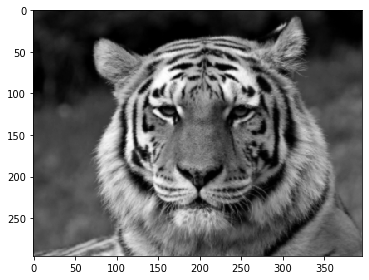

True


In [ ]:
# Gaussian filter

import numpy as np
from skimage import img_as_ubyte

def gauss(sigma, x, y):
    return 1 / (2 * np.pi * sigma**2) * np.exp((-x**2 - y**2) / (2 * sigma**2))

def kernel_elements(sigma):
    k = round(sigma * 6 + 1)
    zero_coord = k // 2
    kernel = [[0 for _ in range(k)] for _ in range(k)]

    for x in range(-zero_coord, zero_coord + 1):
        for y in range(-zero_coord, zero_coord + 1):
            kernel[x + zero_coord][y + zero_coord] = gauss(sigma, x, y)
    kernel = np.array(kernel)
    sum_k = np.sum(kernel)
    kernel /= sum_k

    return kernel

img = imread('tiger-gray-small.png')

sigma = 0.66
kernel = kernel_elements(sigma)

pad = kernel.shape[0] // 2
out_img = np.zeros((img.shape[0] - 2 * pad, img.shape[1] - 2 * pad))
print(out_img.shape)

for i in range(pad, img.shape[0] - pad):
    for j in range(pad, img.shape[1] - pad):
        start = (i - pad, j - pad)
        end = (i + pad, j + pad)
        out_img[i - pad, j - pad] = np.sum(np.multiply(kernel, img[start[0]:end[0] + 1, start[1]:end[1] + 1]))

out_img = np.clip(out_img, 0, 255).astype('uint8')
print(out_img)
imshow(out_img); show()
print(np.array_equal(out_img, img_exp_2))


In [ ]:
# Gaussian filter (stepik version)

import numpy as np

def gauss(sigma, x, y):
    return 1 / (2 * np.pi * sigma**2) * np.exp((-x**2 - y**2) / (2 * sigma**2))

def kernel_elements(sigma):
    k = round(sigma * 6 + 1)
    zero_coord = k // 2
    kernel = [[0 for _ in range(k)] for _ in range(k)]

    for x in range(-zero_coord, zero_coord + 1):
        for y in range(-zero_coord, zero_coord + 1):
            kernel[x + zero_coord][y + zero_coord] = gauss(sigma, x, y)
    kernel = np.array(kernel)
    sum_k = np.sum(kernel)
    kernel /= sum_k

    return kernel

img = imread('img.png')

sigma = 0.66
kernel = kernel_elements(sigma)

pad = kernel.shape[0] // 2
out_img = np.zeros((img.shape[0] - 2 * pad, img.shape[1] - 2 * pad))

for i in range(pad, img.shape[0] - pad):
    for j in range(pad, img.shape[1] - pad):
        start = (i - pad, j - pad)
        end = (i + pad, j + pad)
        out_img[i - pad, j - pad] = np.sum(np.multiply(kernel, img[start[0]:end[0] + 1, start[1]:end[1] + 1]))

out_img = np.clip(out_img, 0, 255).astype('uint8')
imsave('out_img.png', out_img)


## Sharpening

In [ ]:
img = imread('tiger-gray-small.png')

In [ ]:
img_exp_3 = imread('unsharp-tiger.png')

(298, 398) (298, 398)
[[ 34.4  37.   37.9 ...   3.9  -0.5   2.5]
 [ 35.8  37.5  38.  ...   5.5   1.3   2.1]
 [ 33.6  42.7  43.8 ...   4.3   2.7   1.3]
 ...
 [173.4 188.3 150.8 ... 116.6 123.9 108.6]
 [152.4 148.9 129.9 ... 108.3 120.5 104. ]
 [ 85.   74.1  72.3 ... 119.  111.1 131.9]]
[[ 34  37  37 ...   3   0   2]
 [ 35  37  38 ...   5   1   2]
 [ 33  42  43 ...   4   2   1]
 ...
 [173 188 150 ... 116 123 108]
 [152 148 129 ... 108 120 103]
 [ 85  74  72 ... 119 111 131]]


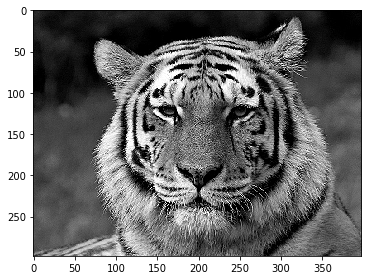

True


In [ ]:
kernel_raw = np.array([[-1, -2, -1], [-2, 22, -2], [-1, -2, -1]])
scale_factor = 1 / 10
kernel = kernel_raw * scale_factor

pad = kernel.shape[0] // 2
out_img = np.zeros((img.shape[0] - 2 * pad, img.shape[1] - 2 * pad))
print(out_img.shape, img_exp_3.shape)  # correct shape

for i in range(pad, img.shape[0] - pad):
    for j in range(pad, img.shape[1] - pad):
        start = (i - pad, j - pad)
        end = (i + pad, j + pad)
        out_img[i - pad, j - pad] = np.sum(np.multiply(kernel, img[start[0]:end[0] + 1, start[1]:end[1] + 1]))
print(out_img)
out_img = np.clip(out_img, 0, 255).astype('uint8')
print(out_img)
imshow(out_img); show()
print(np.array_equal(out_img, img_exp_3))


In [ ]:
# stepik version

from skimage.io import imread, imsave
import numpy as np

img = imread('img.png')

kernel_raw = np.array([[-1, -2, -1], [-2, 22, -2], [-1, -2, -1]])
scale_factor = 1 / 10
kernel = kernel_raw * scale_factor

pad = kernel.shape[0] // 2
out_img = np.zeros((img.shape[0] - 2 * pad, img.shape[1] - 2 * pad))

for i in range(pad, img.shape[0] - pad):
    for j in range(pad, img.shape[1] - pad):
        start = (i - pad, j - pad)
        end = (i + pad, j + pad)
        out_img[i - pad, j - pad] = np.sum(np.multiply(kernel, img[start[0]:end[0] + 1, start[1]:end[1] + 1]))
out_img = np.clip(out_img, 0, 255).astype('uint8')
imsave('out_img.png', out_img)


## Median filter

In [ ]:
img_exp_4 = imread('median-tiger.png')

(294, 394) (294, 394)
[[ 41  41  41 ...   4   4   3]
 [ 41  41  41 ...   4   4   4]
 [ 41  41  41 ...   6   5   5]
 ...
 [102 103 103 ... 100 103 103]
 [103 103 103 ... 103 106 107]
 [111 109 112 ... 104 108 109]]


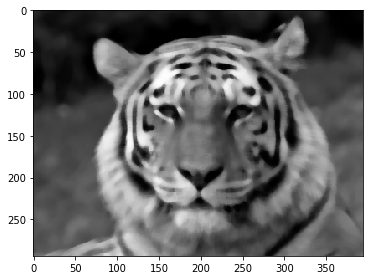

True


In [ ]:
k = 7
pad = k // 2
out_img = np.zeros((img.shape[0] - 2 * pad, img.shape[1] - 2 * pad))
print(out_img.shape, img_exp_4.shape)

for i in range(pad, img.shape[0] - pad):
    for j in range(pad, img.shape[1] - pad):
        start = (i - pad, j - pad)
        end = (i + pad, j + pad)
        tmp = sorted(np.ravel(img[start[0]:end[0] + 1, start[1]:end[1] + 1]))
        out_img[i - pad, j - pad] = tmp[len(tmp) // 2]
out_img = np.clip(out_img, 0, 255).astype('uint8')
print(out_img)
imshow(out_img); show()
print(np.array_equal(out_img, img_exp_4))

In [ ]:
# stepik version

from skimage.io import imread, imsave
import numpy as np

img = imread('img.png')

k = 7
pad = k // 2
out_img = np.zeros((img.shape[0] - 2 * pad, img.shape[1] - 2 * pad))

for i in range(pad, img.shape[0] - pad):
    for j in range(pad, img.shape[1] - pad):
        start = (i - pad, j - pad)
        end = (i + pad, j + pad)
        tmp = sorted(np.ravel(img[start[0]:end[0] + 1, start[1]:end[1] + 1]))
        out_img[i - pad, j - pad] = tmp[len(tmp) // 2]
out_img = np.clip(out_img, 0, 255).astype('uint8')
imsave('out_img.png', out_img)